Requires matplotlib and numpy from pip. The maze animation will be saved as a .gif file into the same directory as this notebook file. output will be diplayed with the graph but it WILL NOT BE ANIMATED, PLEASE view the gif file generated as: 

a_star.gif

KeyboardInterrupt: 

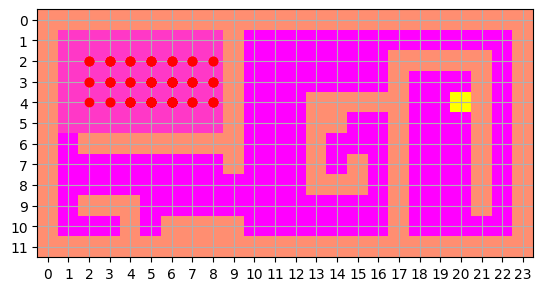

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import random as r                          #import the random library to generate random numbers for random choices is h(n) costs are equal

# Define the maze as a 2D numpy array
maze = np.array([
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,9,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1],
    [1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])

wall = 5
maze = np.where(maze == 1, wall, maze)
def costFn(start, end, current_node):
    #finding the distance of the h(n) and the g(n)
    hx = abs(end[0] - current_node[0]) #will return an absolute value of the difference between the current node and the
    hy = abs(end[1] - current_node[1]) #end node for each dimension
    #h = (hx, hy)

    gx = abs(current_node[0] - start[0]) #same for the g(n)
    gy = abs(current_node[1] - start[1])
    #g = (gx, gy)

    fx, fy = hx + gx, hy + gy #####add a return value ffor gx so that the best value will be picked based upon highest g vvalue (distance from home node)
    f = fx + fy
    return int(f) #return the cost of the node as an integer value to be used in the transition function

#the main plot: (the motion picture of A Star actor!)
def transition(current_node, visited, visited_clone, explore_stack, start, end, wall, maze, temperature):
    child_nodes = {
        'up': (current_node[0], current_node[1] - 1),
        'upright': (current_node[0] - 1, current_node[1] - 1), #diagonal nodes
        'right': (current_node[0] - 1, current_node[1]),
        'downright': (current_node[0] + 1, current_node[1] + 1), #diagonal nodes
        'down': (current_node[0], current_node[1] + 1),
        'downleft': (current_node[0] + 1, current_node[1] - 1), #diagonal nodes
        'left': (current_node[0] + 1, current_node[1]),
        'upleft': (current_node[0] - 1, current_node[1] + 1) #diagonal nodes
    }
    temp = {}  # copy the child_nodes dictionary to a temporary dictionary

    for node in child_nodes:
        x, y = child_nodes[node]  # unpack the tuple
        if (maze[child_nodes[node][1]][child_nodes[node][0]] != wall) and (child_nodes[node] not in (visited and list(set(visited_clone) ^ set(visited)))): #if the node is not a wall AND has not been visited
            if maze[child_nodes[node][1]][child_nodes[node][0]] == wall:  # if the node is a wall
                continue
            else:
                maze[y][x] = 2  # mark the node as explored
            temp[node] = costFn(start, end, child_nodes[node])  # find the cost of the node and assign it to a temporary dictionary
    if len(temp) == 0:  # if no more nodes to explore in the current search space
        if len(visited) > 1:  # if there are previously visited nodes
            visited.pop()  # backtrack by removing the current node from visited
            current_node = visited[-1]  # set the current node to the previous node
            print("Backtracked to point:", current_node)	# print the node that the algorithm backtracked to
            
        else:
            return current_node, visited, visited_clone, explore_stack   # no more nodes to explore, return current state

    else:
        explore_stack.update(temp)  # add the nodes to the stack of explored nodes

        min_cost = min(temp.values())  # Find the minimum cost
        min_nodes = [node for node, cost in temp.items() if cost == min_cost]  # Get all nodes with the minimum cost
        chosen_node = r.choice(min_nodes)  # Randomly choose a node with the minimum cost

        # Annealing: Accept worse solutions with a probability based on the temperature
        if temperature > 0:
            delta_cost = min_cost - costFn(start, end, current_node)
            acceptance_prob = min(1, np.exp(-delta_cost / temperature))
            if r.random() < acceptance_prob:
                current_node = child_nodes[chosen_node]  # Set the current node to the node with the minimum cost

    return current_node, visited, visited_clone, explore_stack 


# Define the start and end node
start = (2, 2)
end = (20, 4)
current_node = start
visited = [start]
visited_clone = [start]  # copy the visited list to a temporary list
wrong_path = []  # list to hold nodes that are not part of the correct path
explore_stack = {} #initialize the stack to hold the nodes that have been explored

fig, ax = plt.subplots()
plt.xticks(range(0,len(maze[0])))       #add ticks on graph for each node
plt.yticks(range(0,len(maze)))
plt.grid()                              #add grid to graph to help see the nodes
ax.imshow(maze, cmap='PuRd')
line, = ax.plot([], [], 'b-')           #initialize the line with no data
writer = animation.PillowWriter(fps=10) #initialize the animation writer

with writer.saving(fig, "animations/a_star.gif", 70):                  #save the animation as a gif
    while current_node != end:                                                      #the number of iterations to run the algorithm for:
        current_node, visited, visited_clone, explore_stack = transition(current_node, visited, visited_clone, explore_stack, start, end, wall, maze, 1)   #input and output of the transition function
        if current_node not in visited:
            visited.append(current_node)
            visited_clone.append(current_node)
            wrong_path.append(set(visited_clone) ^ set(visited)) # find the nodes that are not part of the correct path
        plt.plot(current_node[0], current_node[1], 'ro') # plot the current node on the graph as red circle
        ax.imshow(maze, cmap='spring')

        writer.grab_frame()